In [12]:
from pathlib import Path
from leafy.loader import ImageLoader
from torchvision.transforms import ToPILImage
from PIL import Image
topil = ToPILImage()

data_folder = Path("./images")

loader = ImageLoader(data_folder)        

Grape_Esca


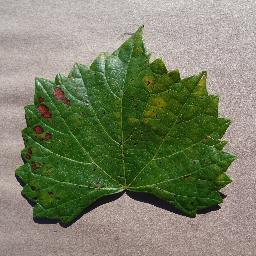

In [3]:


im, class_name = loader[0]
print(class_name)
topil(im)

/home/jbarmentlo/Code/42/42-Leafliction/venv/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


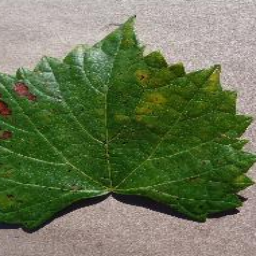

In [4]:
from torchvision.transforms import RandomResizedCrop

rc = RandomResizedCrop(size=im.shape[1:], scale=(0.5, 1.0), ratio=(0.75, 1.3333333333333333), interpolation=2)
topil(rc(im))

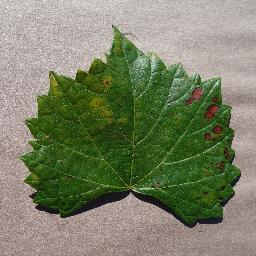

In [5]:
from torchvision.transforms import RandomHorizontalFlip

flip = RandomHorizontalFlip(p=1.0)
topil(flip(im))

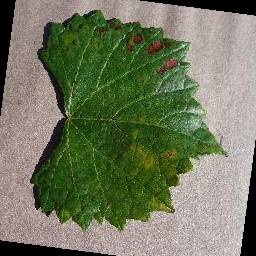

In [6]:
from torchvision.transforms import RandomRotation

rot = RandomRotation(degrees=[0, 360])
topil(rot(im))

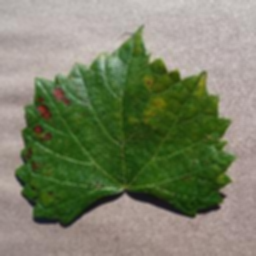

In [7]:
from torchvision.transforms import GaussianBlur

gauss = GaussianBlur(kernel_size=5, sigma=(0.8, 3.0))
topil(gauss(im))

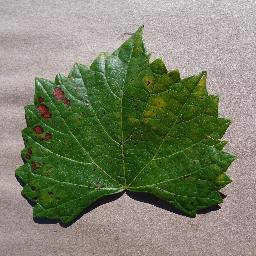

In [8]:
from torchvision.transforms import RandomAutocontrast

contraster = RandomAutocontrast(p=1.0)
topil(contraster(im))

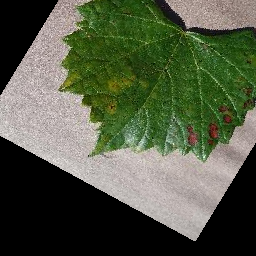

In [9]:
from torchvision.transforms import RandomAffine

shear = RandomAffine(degrees=[0,360], translate=(0.1, 0.3), scale=(0.9, 1.1), shear=(-30, 30))
topil(shear(im))

In [14]:
from typing import Dict, Callable
from torch import Tensor

from leafy.Augmentation import Augmentinator



/home/jbarmentlo/Code/42/42-Leafliction/venv/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


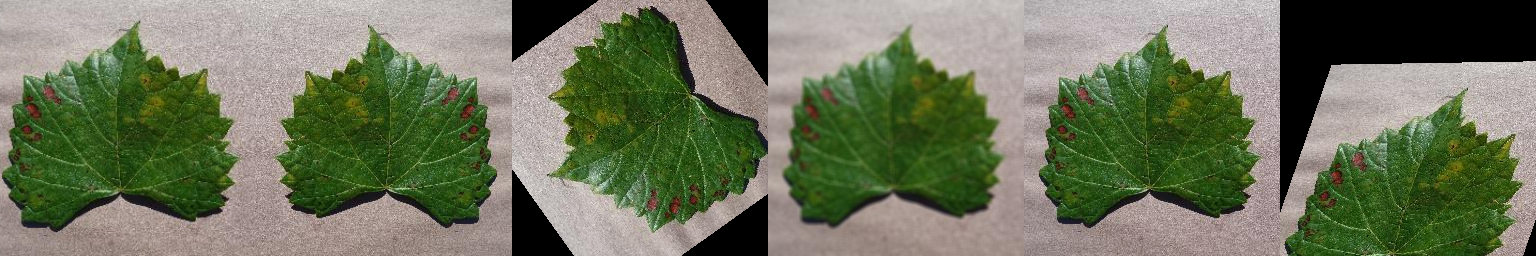

In [15]:
from torchvision.transforms import RandomResizedCrop
from torchvision.transforms import RandomHorizontalFlip
from torchvision.transforms import RandomRotation
from torchvision.transforms import GaussianBlur
from torchvision.transforms import RandomAutocontrast
from torchvision.transforms import RandomAffine

from torchvision.transforms.functional import to_pil_image
from PIL.Image import Image
import torch

def make_image_row(images: dict[str, Tensor]) -> Image:
    return to_pil_image(torch.cat([im for im in images.values()], dim=2))


rc         = RandomResizedCrop(size  =im.shape[1:], scale=(0.5, 1.0), ratio=(0.75, 1.3333333333333333), interpolation=2)
flip       = RandomHorizontalFlip(p  =1.0)
rot        = RandomRotation(degrees  =[0, 360])
gauss      = GaussianBlur(kernel_size=5, sigma           =(0.1, 3.0))
contraster = RandomAutocontrast(p    =1.0)
shear      = RandomAffine(degrees    =[0,360], translate =(0.1, 0.3), scale=(0.9, 1.1), shear                        =(-30, 30))

transformations = {
    "crop"    : rc,
    "flip"    : flip,
    "rotation": rot,
    "blur"    : gauss,
    "contrast": contraster,
    "shear"   : shear
}

aug = Augmentinator(transformations)
augmented = aug.augment(im)
make_image_row(augmented)


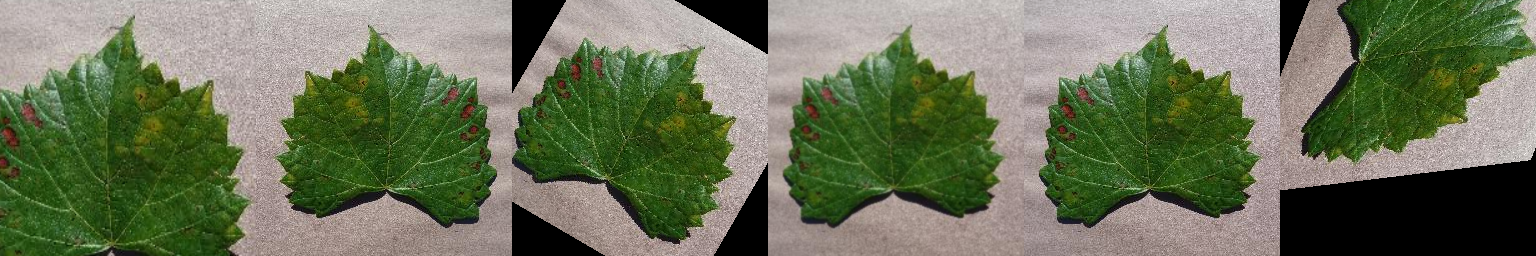

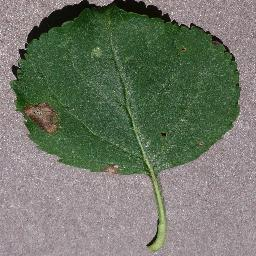

In [3]:
from PIL import Image